In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Check https://github.com/matplotlib/basemap
#\python -m pip install basemap-data
from utils import plot_geomap

In [3]:
business_file = '../project_data/yelp_business.csv'
review_file = '../project_data/yelp_review.csv'

# business_file = '../project_data/yelp_business.csv'
# review_file = 'yelp_review.csv'

# Load the business data and review data
business_df = pd.read_csv(business_file)
review_df = pd.read_csv(review_file)

In [4]:
print('business data :', business_df.shape)
print('review data :', review_df.shape)
business_df = business_df.dropna(subset=['categories'])
review_df = review_df.dropna(subset=['text'])
review_df = review_df.sample(frac=0.01, random_state=42)
print('After dropping NA: business data :', business_df.shape)
print('After dropping NA: review data :', review_df.shape)

# Filter out businesses that are not restaurants
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants')]
restaurant_ids = restaurant_df['business_id'].values

# Filter out reviews that are not for restaurants
restaurant_review_df = review_df[review_df['business_id'].isin(restaurant_ids)]

print('Number of reviews for restaurants:', len(restaurant_review_df))
print(review_df.head())
print(business_df.head())

business data : (150346, 14)
review data : (6990280, 9)
After dropping NA: business data : (150243, 14)
After dropping NA: review data : (69903, 9)
Number of reviews for restaurants: 47195
                      review_id                 user_id  \
1295256  J5Q1gH4ACCj6CtQG7Yom7g  56gL9KEJNHiSDUoyjk2o3Q   
3297618  HlXP79ecTquSVXmjM10QxQ  bAt9OUFX9ZRgGLCXG22UmA   
1217795  JBBULrjyGx6vHto2osk_CQ  NRHPcLq2vGWqgqwVugSgnQ   
3730348  U9-43s8YUl6GWBFCpxUGEw  PAxc0qpqt5c2kA0rjDFFAg   
1826590  8T8EGa_4Cj12M6w8vRgUsQ  BqPR1Dp5Rb_QYs9_fz9RiA   

                    business_id  stars  useful  funny  cool  \
1295256  8yR12PNSMo6FBYx1u5KPlw    2.0       1      0     0   
3297618  pBNucviUkNsiqhJv5IFpjg    5.0       0      0     0   
1217795  8sf9kv6O4GgEb0j1o22N1g    5.0       0      0     0   
3730348  XwepyB7KjJ-XGJf0vKc6Vg    4.0       0      0     0   
1826590  prm5wvpp0OHJBlrvTj9uOg    5.0       0      0     0   

                                                      text  \
1295256  Went f

In [5]:
population_df = pd.read_csv('us_pop_by_state.csv')

In [6]:
merged_df = pd.merge(restaurant_review_df, restaurant_df, on='business_id', how='inner')
merged_df = merged_df.rename(columns={'stars_x': 'review_stars', 'stars_y': 'business_stars'})
merged_df.head()

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,business_stars,review_count,is_open,attributes,categories,hours
0,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2.0,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,Bru Burger Bar - Indianapolis,...,IN,46204,39.773307,-86.152091,4.0,1608,1,"{'BikeParking': 'True', 'GoodForKids': 'True',...","Restaurants, Gluten-Free, Bars, Food, Nightlif...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
1,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4.0,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,Joe's Seafood,...,PA,19403,40.139854,-75.387321,3.0,7,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Seafood Markets, Food, Restaurants, Seafood, S...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
2,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5.0,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,Rumbi Island Grill,...,ID,83709,43.604645,-116.289834,3.5,29,0,"{'HasTV': 'False', 'GoodForMeal': ""{'dessert':...","Sandwiches, Salad, Restaurants, Hawaiian, Cari...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
3,18E_haOfOm8ks-A7SlVWRg,bnDZpsii_if2_wpn8oPcig,bK0j7YtVyN98UnM_8fUONg,3.0,1,1,1,Dirt cheap happy hour specials. Half priced d...,2011-11-08 01:30:27,Tavern on Broad,...,PA,19102,39.949119,-75.164844,2.5,282,0,"{'NoiseLevel': ""u'very_loud'"", 'RestaurantsPri...","American (New), Bars, Sports Bars, Restaurants...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
4,xQVDB9xRdpLmPh9XMQ6Gvg,yy38DH7ENFTJ10-d4GUlig,S26FJcC298XNpN2cZiwOrA,5.0,0,0,0,Nothing beats pizza and beer in my book. This ...,2012-12-24 02:18:18,Pi Pizzeria - Central West End,...,MO,63108,38.648864,-90.260690,4.0,488,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [7]:
merged_df = pd.merge(merged_df, population_df, left_on='state', right_on='state_code', how='inner')
merged_df.head(5)

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,...,review_count,is_open,attributes,categories,hours,rank,state_y,state_code,2020_census,percent_of_total
0,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2.0,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,Bru Burger Bar - Indianapolis,...,1608,1,"{'BikeParking': 'True', 'GoodForKids': 'True',...","Restaurants, Gluten-Free, Bars, Food, Nightlif...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",17.0,Indiana,IN,6785528,0.0203
1,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4.0,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,Joe's Seafood,...,7,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Seafood Markets, Food, Restaurants, Seafood, S...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ...",5.0,Pennsylvania,PA,13002700,0.0386
2,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5.0,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,Rumbi Island Grill,...,29,0,"{'HasTV': 'False', 'GoodForMeal': ""{'dessert':...","Sandwiches, Salad, Restaurants, Hawaiian, Cari...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",38.0,Idaho,ID,1839106,0.0054
3,18E_haOfOm8ks-A7SlVWRg,bnDZpsii_if2_wpn8oPcig,bK0j7YtVyN98UnM_8fUONg,3.0,1,1,1,Dirt cheap happy hour specials. Half priced d...,2011-11-08 01:30:27,Tavern on Broad,...,282,0,"{'NoiseLevel': ""u'very_loud'"", 'RestaurantsPri...","American (New), Bars, Sports Bars, Restaurants...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",5.0,Pennsylvania,PA,13002700,0.0386
4,xQVDB9xRdpLmPh9XMQ6Gvg,yy38DH7ENFTJ10-d4GUlig,S26FJcC298XNpN2cZiwOrA,5.0,0,0,0,Nothing beats pizza and beer in my book. This ...,2012-12-24 02:18:18,Pi Pizzeria - Central West End,...,488,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",19.0,Missouri,MO,6154913,0.0182


## Descriptive Statistics

**Methodology**

The goal of the descriptive statistical analysis was to summarize key characteristics of the dataset and provide foundational insights into the data distribution, variability, and central tendencies of specific features. For this study, we focused on the following descriptive metrics:

- **Mean, Median, and Mode**: Calculated for review ratings and review lengths to understand central tendencies. The mean provided an average score for each cuisine type, while the median and mode helped identify the most common values within each group.
- **Range, Variance, and Standard Deviation**: Used to measure the spread and variability of review ratings and lengths. The range indicated the minimum and maximum values, while variance and standard deviation provided insights into the extent of dispersion, helping to identify categories with high variability in ratings or review lengths.
- **Grouping by Categories and Time**: Data was grouped by cuisine type and month to examine variations in average ratings and review counts. This grouping allowed us to observe trends and patterns within each category and across different times of the year.


In [9]:
# Find the descriptive statistics for the merged data
descriptive_stats = merged_df.describe().T
descriptive_stats['mode'] = merged_df.mode().iloc[0]

# Display the descriptive statistics
display(descriptive_stats)

,count,mean,std,min,25%,50%,75%,max,mode
review_stars,46510.0,3.803827e+00,1.388345e+00,1.000000,3.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.0
useful,46510.0,9.756826e-01,2.885524e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,3.500000e+02,0.0
funny,46510.0,2.934423e-01,1.239244e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.900000e+01,0.0
cool,46510.0,4.759192e-01,2.428298e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.0
latitude,46510.0,3.561596e+01,4.910495e+00,27.564457,2.995892e+01,3.858451e+01,3.993934e+01,4.369549e+01,29.954273
longitude,46510.0,-8.874115e+01,1.415346e+01,-120.026076,-9.020567e+01,-8.615683e+01,-7.542934e+01,-7.469984e+01,-90.068965
business_stars,46510.0,3.796592e+00,6.245239e-01,1.000000,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.0
review_count,46510.0,5.025304e+02,8.712329e+02,5.000000,9.200000e+01,2.250000e+02,5.185000e+02,7.568000e+03,34.0
is_open,46510.0,8.002365e-01,3.998268e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0
rank,46510.0,1.310460e+01,1.022154e+01,1.000000,5.000000e+00,1.400000e+01,1.900000e+01,4.500000e+01,5.0


In [10]:
cuisine_types = ["Italian", "Chinese", "Mexican",
                "Japanese", "American", "Indian"]

# List to store rows of statistics for each cuisine
stats_data = []

for cuisine in cuisine_types:
    cuisine_df = merged_df[merged_df['categories'].str.contains(cuisine, case=False, na=False)]

    stats = {
        'Cuisine': cuisine,
        'Review Stars Mean': cuisine_df['review_stars'].mean(),
        'Review Stars Median': cuisine_df['review_stars'].median(),
        'Review Stars Mode': cuisine_df['review_stars'].mode().iloc[0]
          if not cuisine_df['review_stars'].mode().empty else None,
        'Review Stars Range': cuisine_df[
            'review_stars'].max() - cuisine_df['review_stars'].min(),
        'Review Stars Variance': cuisine_df['review_stars'].var(),
        'Review Stars Std Dev': cuisine_df['review_stars'].std(),
        'Useful Mean': cuisine_df['useful'].mean(),
        'Useful Median': cuisine_df['useful'].median(),
        'Useful Mode': cuisine_df['useful'].mode().iloc[0]
          if not cuisine_df['useful'].mode().empty else None,
        'Useful Range': cuisine_df['useful'].max() - cuisine_df['useful'].min(),
        'Useful Variance': cuisine_df['useful'].var(),
        'Useful Std Dev': cuisine_df['useful'].std(),
    }

    stats_data.append(stats)

# Create DataFrame from the list of dictionaries
stats_df = pd.DataFrame(stats_data)
print(stats_df)

    Cuisine  Review Stars Mean  Review Stars Median  Review Stars Mode  \
0   Italian           3.795886                  4.0                5.0   
1   Chinese           3.718396                  4.0                5.0   
2   Mexican           3.744847                  4.0                5.0   
3  Japanese           3.838573                  4.0                5.0   
4  American           3.776631                  4.0                5.0   
5    Indian           4.042236                  5.0                5.0   

   Review Stars Range  Review Stars Variance  Review Stars Std Dev  \
0                 4.0               1.952291              1.397244   
1                 4.0               1.998529              1.413693   
2                 4.0               2.065466              1.437173   
3                 4.0               1.867826              1.366684   
4                 4.0               1.887218              1.373761   
5                 4.0               1.659905              1.2

In [11]:
# Convert date to datetime format if not already
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Extract month and year from the date
merged_df['month'] = merged_df['date'].dt.month
merged_df['year'] = merged_df['date'].dt.year

# Group by month and calculate review count and average rating
monthly_trends = merged_df.groupby('month').agg(
    review_count=('review_id', 'count'),
    avg_rating=('review_stars', 'mean'),
    median_rating=('review_stars', 'median'),
    std=('review_stars', 'std'),
    range=('review_stars', lambda x: x.max() - x.min())
).reset_index()

print(monthly_trends)

    month  review_count  avg_rating  median_rating       std  range
0       1          4095    3.840537            4.0  1.365968    4.0
1       2          3609    3.779163            4.0  1.392786    4.0
2       3          4014    3.817887            4.0  1.371988    4.0
3       4          3657    3.837572            4.0  1.366359    4.0
4       5          3892    3.800103            4.0  1.404227    4.0
5       6          3995    3.782478            4.0  1.402478    4.0
6       7          4336    3.792205            4.0  1.385356    4.0
7       8          4252    3.778457            4.0  1.384230    4.0
8       9          3722    3.806018            4.0  1.393148    4.0
9      10          3802    3.858759            4.0  1.379478    4.0
10     11          3484    3.781860            4.0  1.417885    4.0
11     12          3652    3.769989            4.0  1.398711    4.0


In [12]:
# Calculate additional statistics for review length grouped by rating
merged_df['review_length'] = merged_df['text'].apply(len)
review_length_by_rating = merged_df.groupby('review_stars').agg(
    average_review_length=('review_length', 'mean'),
    median_review_length=('review_length', 'median'),
    std_review_length=('review_length', 'std'),
    range_review_length=('review_length', lambda x: x.max() - x.min()),
    max_review_length=('review_length', 'max'),
    min_review_length=('review_length', 'min')
).reset_index()

# Rename columns for clarity
review_length_by_rating.columns = ['Rating', 'Average Review Length',
                                'Median Review Length', 'Standard Deviation',
                                'Range', 'Max Length', 'Min Length']

# Display the results
print(review_length_by_rating)

   Rating  Average Review Length  Median Review Length  Standard Deviation  \
0     1.0             627.099076                 454.0          582.129963   
1     2.0             696.353372                 529.0          605.006344   
2     3.0             652.232329                 494.0          556.113263   
3     4.0             581.041281                 419.0          510.367645   
4     5.0             442.827178                 309.0          422.296005   

   Range  Max Length  Min Length  
0   4955        5000          45  
1   4948        4994          46  
2   4987        5000          13  
3   4928        4959          31  
4   4978        4995          17  


### 1. Review Ratings (`review_stars` and `business_stars`)
   - **Mean**: The mean of `review_stars` is 3.80, while `business_stars` has a mean of 3.79, indicating that reviews generally reflect favorable customer sentiment.
   - **Median (50%)**: Both features have a median of 4.0, confirming a tendency toward positive reviews.
   - **Mode**: The mode of `review_stars` is 5, suggesting that 5-star ratings are the most frequent in individual reviews.
   - **Standard Deviation**: `review_stars` has a standard deviation of 1.39, indicating more variation in individual review ratings compared to `business_stars`, which has a lower standard deviation of 0.62.
   - **Range**: The ratings cover the full range from 1 to 5 for both review-based and business-based ratings.

   **Interpretation**: The general trend towards high ratings suggests customer satisfaction across businesses. The slightly higher variability in `review_stars` may indicate differences across types of restaurants or regions, which can be explored by segmenting ratings by category or geography.

### 2. Engagement Metrics (`useful`, `funny`, `cool`)
   - **Mean and Median**: All three metrics (`useful`, `funny`, `cool`) have low means and medians (close to 0), showing that most reviews receive little engagement.
   - **Mode**: All three metrics have a mode of 0, suggesting many reviews receive no additional marks for usefulness, humor, or coolness.
   - **Standard Deviation and Range**: The high standard deviation and maximum values, especially for `useful` (up to 350), indicate that while engagement is generally low, some reviews receive exceptionally high engagement.

   **Interpretation**: The high variability in engagement suggests that while most reviews are not highly engaging, a subset of reviews stands out. These highly engaging reviews could correspond to more detailed, positive reviews, indicating that detailed reviews are more likely to be valued by other users.

### 3. Geographic Features (`latitude`, `longitude`)
   - **Mean and Range**: The mean latitude is approximately 35.6, and the mean longitude is -88.7, which spans a wide geographical area across the U.S.
   - **Standard Deviation**: The standard deviations for latitude (4.91) and longitude (14.15) reflect a broad geographical coverage of businesses.

   **Interpretation**: The dataset’s wide geographic spread suggests potential for regional trend analysis. Segmenting ratings and review counts by location could reveal preferences unique to certain areas.

### 4. Review Count (`review_count`)
   - **Mean**: The mean review count is 502, while the median is much lower at 225, indicating a skew where some businesses receive significantly more reviews.
   - **Standard Deviation**: A high standard deviation (871) implies substantial variation in review counts across businesses.
   - **Range**: The minimum review count is 5, while the maximum is 7,568, showing that some businesses attract far more customer attention.

   **Interpretation**: This variability in review counts suggests that certain businesses are more popular or established, attracting more reviews. Analyzing review count trends by category or location could help identify factors that drive customer engagement.



### Preliminary Conclusions
These updated descriptive statistics provide a comprehensive foundation for answering guiding questions:
  
<span style="color:orange;">**How do review ratings vary by restaurant category (e.g., fast food vs. fine dining) in the U.S.?**

**Review Ratings by Category**: 
1. **Mean Ratings**:
   - **Highest Mean Rating**: Indian cuisine has the highest average rating, with a mean of **4.04**, indicating that customers generally rate Indian restaurants more favorably compared to other cuisines.
   - **Lowest Mean Rating**: Chinese cuisine has the lowest mean rating of **3.72**, which, while still generally positive, suggests slightly lower customer satisfaction compared to other types.
   - Other cuisines, such as Italian, Mexican, and American, fall around the mid-range, with mean ratings close to **3.8**, while Japanese cuisine is slightly higher at **3.84**.

2. **Median and Mode**:
   - The median rating is **4.0** for all cuisines, showing that at least half of the reviews for each cuisine rate the experience positively.
   - The mode (most frequent rating) is **5.0** across all cuisines, indicating a tendency for customers to leave high ratings, regardless of cuisine type.

3. **Range**:
   - All cuisines have a range of **4.0** (from 1 to 5), meaning that each cuisine has received the full spread of possible ratings. This suggests that every cuisine has a mix of both highly favorable and critical reviews.

4. **Variance and Standard Deviation**:
   - **Highest Variability**: Mexican cuisine has the highest variance (**2.07**) and standard deviation (**1.44**), indicating that reviews for Mexican restaurants are more varied, with a mix of both high and low ratings.
   - **Lowest Variability**: Indian cuisine has the lowest variance (**1.66**) and standard deviation (**1.29**), suggesting that reviews are more consistent, often skewing towards higher ratings.

**Useful Score by Category**:

1. **Mean Useful Score**:
   - **Highest Engagement**: Indian cuisine has the highest mean useful score (**1.16**), suggesting that reviews for Indian restaurants are slightly more helpful or engaging to other users.
   - Other cuisines, including Italian, Chinese, and American, have mean useful scores close to **1.0**, while Japanese and Mexican cuisines are slightly lower, around **0.92** and **0.93**, respectively.

2. **Median and Mode**:
   - The median useful score is **0** across all cuisines, and the mode is also **0**. This indicates that most reviews do not receive any "useful" marks, reflecting limited engagement for most individual reviews.

3. **Range and Variability**:
   - **Highest Range and Variance**: American cuisine has the widest range in useful scores (from 0 to 350) and the highest variance (**11.66**), showing significant variability. This may indicate that while most reviews are not marked as useful, a subset of reviews is highly valued.
   - **Lowest Variability**: Japanese cuisine has the lowest variance in useful scores (**3.68**) and a smaller range, suggesting that engagement is more uniform across reviews.

**Preliminary Insights**

- **Regional Trends and Customer Preferences**: The higher average rating for Indian cuisine could indicate a more favorable reception across regions, possibly due to unique flavors or an increasing interest in diverse foods. In contrast, the lower mean for Chinese cuisine suggests there may be regional variations in customer expectations or experiences that affect ratings.
  
- **Engagement Patterns**: The high variability in useful scores, particularly for American cuisine, may suggest that certain reviews, perhaps those with detailed descriptions or critiques, receive more interaction. This could reflect customer interest in specific dining experiences within the American category.

<span style="color:orange;">**What times of the year do restaurants tend to receive the most reviews, and how does this trend affect review sentiment?**

1. **Peak Review Months**:
   - The months with the highest review counts are **July** (4,336 reviews) and **August** (4,252 reviews). This indicates that summer is a peak period for review activity, likely due to increased dining out during vacations or holidays.
   - **January** also shows a high review count (4,095), potentially reflecting increased dining following the holiday season.

2. **Lowest Review Months**:
   - **November** (3,484 reviews) and **February** (3,609 reviews) have the lowest review counts, possibly due to colder weather and reduced foot traffic at restaurants during these months.

3. **Review Sentiment Across Months**:
   - **Highest Average Ratings**: **October** has the highest average rating (3.86), followed closely by **January** (3.84), indicating that these months might offer more positive dining experiences or align with favorable customer sentiment.
   - **Lowest Average Ratings**: **December** (3.77) and **August** (3.78) show the lowest average ratings. This dip during peak periods, such as August, may suggest that the high volume of diners could affect service quality or elevate customer expectations.

4. **Median Ratings**:
   - The median rating remains consistent at **4.0** across all months, indicating that at least half of the reviews in each month give a 4-star rating or higher. This uniform median reflects generally favorable customer sentiment throughout the year.

5. **Standard Deviation**:
   - **Highest Variability**: **November** has the highest standard deviation (1.42), indicating that reviews in this month are more dispersed, with a mix of both high and low ratings.
   - **Lowest Variability**: **January** (1.37) and **April** (1.37) show slightly lower variability in ratings, suggesting more consistent experiences during these months, with ratings clustering closer to the average.

6. **Range**:
   - The range is consistently **4.0** across all months, showing that reviews cover the full rating spectrum from 1 to 5 stars. This consistent range suggests that every month sees a mix of very positive and very negative reviews, regardless of overall sentiment trends.

**Preliminary Insights**
- **Most Active Months**: Summer months, especially **July** and **August**, see the highest review counts, suggesting a peak in restaurant visits during this period.
- **Review Sentiment**: The highest average ratings are observed in October and January, while sentiment dips slightly in December and August. This trend suggests that increased demand in peak months (summer and holiday season) may impact service quality or customer expectations, leading to slightly lower average ratings.
- **Variability in Sentiment**: November shows the highest variability in ratings, indicating mixed customer experiences, while January and April have more consistent ratings, reflecting steadier customer satisfaction.


<span style="color:orange;">**Are restaurants with higher average ratings more likely to have detailed reviews compared to those with lower ratings?**
1. **Average Review Length**:
   - **1-star reviews** have an average length of approximately **627 characters**.
   - **2-star reviews** are even longer, with an average of **696 characters**.
   - **3-star and 4-star reviews** decrease in length, with averages of **652** and **581 characters**, respectively.
   - **5-star reviews** are the shortest, averaging **443 characters**.

   This indicates that lower-rated reviews are generally longer, suggesting that dissatisfied customers tend to leave more detailed feedback. This may be because they feel the need to elaborate on their negative experience, whereas satisfied customers are typically more concise.

2. **Median Review Length**:
   - The median review length aligns with the averages, showing a similar downward trend as ratings increase.
   - **1-star reviews** have a median of **454 characters**, while **5-star reviews** have a median of **309 characters**.
   - This supports the idea that more detailed reviews are commonly associated with lower ratings, as dissatisfied customers are more likely to elaborate.

3. **Standard Deviation**:
   - **1-star reviews** have the highest standard deviation (582), indicating a wide variation in the length of negative reviews.
   - This standard deviation decreases with higher ratings, reaching the lowest for **5-star reviews** (422).
   - This suggests that higher-rated reviews are not only shorter but also more consistent in length, while lower ratings exhibit more variability, with both concise and detailed reviews.

4. **Range, Maximum, and Minimum Lengths**:
   - The range of review lengths is consistently high across all ratings, around **4900 characters**.
   - **Maximum Length**: All ratings have some very long reviews, with maximum lengths close to 5000 characters, showing that extremely detailed reviews exist across the spectrum.
   - **Minimum Length**: Lower ratings have slightly higher minimum lengths (e.g., **45 characters** for 1-star) compared to 5-star reviews (as low as **17 characters**). This implies that even the shortest lower-rated reviews tend to be longer than the shortest 5-star reviews.

**Preliminary Insights**
- **Lower Ratings Are More Likely to Be Detailed**: Lower ratings (1 and 2 stars) have higher average and median review lengths, suggesting that dissatisfied customers often provide more detailed feedback.
- **Higher Ratings Tend to Be Concise**: Higher ratings (particularly 5 stars) are associated with shorter and more consistent review lengths, indicating that satisfied customers generally leave concise feedback.
- **Range and Extremes**: Although the range is high for all ratings, indicating the presence of very detailed reviews in all categories, the tendency toward longer reviews at lower ratings remains clear.


## Inferential Statistics

**Methodology**  

To explore statistically significant relationships and differences within the data, we conducted inferential statistical tests, specifically using ANOVA and Chi-Square tests:

- **ANOVA (Analysis of Variance)**: 
  - We performed one-way ANOVA tests to investigate whether the average review ratings differed significantly between cuisine types and across months. The ANOVA test was appropriate for comparing the means of multiple groups to determine if there were statistically significant differences. 
  - For example, when testing average ratings by cuisine type, we set up the following hypotheses:
    - **Null Hypothesis (H₀)**: There is no significant difference in average review ratings across cuisine types.
    - **Alternative Hypothesis (H₁)**: There is a significant difference in average review ratings across cuisine types.
  - The resulting p-values were compared against a significance level of 0.05. If the p-value was below this threshold, we rejected the null hypothesis, indicating that there were statistically significant differences in average ratings across groups.
  
- **Chi-Square Test**:
  - We conducted a Chi-Square test to examine whether there was a significant difference in the number of reviews across months, indicating possible seasonal patterns. This test was suitable for assessing differences in categorical frequency distributions.
  - Hypotheses for the Chi-Square test included:
    - **Null Hypothesis (H₀)**: Review counts are uniformly distributed across all months.
    - **Alternative Hypothesis (H₁)**: Review counts differ significantly across months.
  - By examining the Chi-Square statistic and corresponding p-value, we determined whether there was evidence of seasonal trends in customer engagement.

### 1. ANOVA Test on Review Ratings by Category(Cuisine Type)

**Objective**: To determine if there is a significant difference in average review ratings across different categories(cuisine types).

#### Hypotheses
- **Null Hypothesis (H₀)**: There is no significant difference in average review ratings between cuisine types.
- **Alternative Hypothesis (H₁)**: There is a significant difference in average review ratings between cuisine types.

#### Significance Level
- Set at **0.05**.

---

### 2. Chi-Square Test for Review Counts by Month

**Objective**: To determine if there is a significant difference in review counts across different months, indicating a seasonal pattern in review activity.

#### Hypotheses
- **Null Hypothesis (H₀)**: Review counts are uniformly distributed across all months (no significant difference).
- **Alternative Hypothesis (H₁)**: Review counts differ significantly by month.

#### Significance Level
- Set at **0.05**.

---

### 3. One-Way ANOVA Test for Review Length by Rating

**Objective**: To examine if review lengths differ significantly based on review ratings (e.g., whether higher or lower ratings correlate with more detailed reviews).

#### Hypotheses
- **Null Hypothesis (H₀)**: There is no significant difference in average review length across different ratings.
- **Alternative Hypothesis (H₁)**: There is a significant difference in average review length across different ratings.

#### Significance Level
- Set at **0.05**.

In [ ]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chisquare


# Q1: Is there a significant difference in average review ratings
# across different categories(cuisine types)?
def identify_cuisine(row):
    for cuisine in cuisine_types:
        if cuisine.lower() in str(row['categories']).lower():
            return cuisine
    return 'Other'  # Assign 'Other' if no match is found


# Apply the function to create a new 'cuisine_type' column
merged_df['cuisine_type'] = merged_df.apply(identify_cuisine, axis=1)
model = ols('review_stars ~ C(cuisine_type)', data=merged_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("Reject H₀: There is a significant difference in average review ratings across months.")
else:
    print("Fail to reject H₀: Average review ratings do not significantly differ across months.")

# Q2: Is there a significant difference in review counts across months?

# Count reviews by month
monthly_counts = merged_df['month'].value_counts().sort_index()

# Perform Chi-Square test
chi2_stat, p_value = chisquare(monthly_counts)

print('\n')
print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in review counts across months.")
else:
    print("Fail to reject H₀: Review counts do not significantly differ across months.")

# Q3: Is there a significant difference in average review length across different ratings?

# Group review lengths by rating
lengths_by_rating = [merged_df[merged_df['review_stars'] == rating]['review_length'] for rating in sorted(merged_df['review_stars'].unique())]

# Perform the one-way ANOVA
f_stat, p_value = f_oneway(*lengths_by_rating)

# Display the results
print('\n')
print(f"F-statistic: {f_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in average review length across different ratings (Reject H₀).")
else:
    print("There is no significant difference in average review length across different ratings (Fail to reject H₀).")


                      sum_sq       df          F        PR(>F)
C(cuisine_type)    140.79006      6.0  12.191379  9.468458e-14
Residual         89505.32871  46503.0        NaN           NaN
Reject H₀: There is a significant difference in average review ratings across months.


Chi-Square Statistic: 202.9704579660288, p-value: 1.798766995757427e-37
Reject H₀: There is a significant difference in review counts across months.


F-statistic: 421.8788743045864, p-value: 0.0
There is a significant difference in average review length across different ratings (Reject H₀).


### 1. ANOVA Test on Review Ratings by Cuisine Type

#### Results
- **F-statistic**: 12.191
- **p-value**: 9.47e-14 (very small, practically 0)

#### Interpretation
- Since the p-value is less than 0.05, we **reject the null hypothesis**.
- **Conclusion**: There is a significant difference in average review ratings across different cuisine types. This suggests that certain cuisines may be rated higher or lower on average compared to others.

---

### 2. Chi-Square Test for Review Counts by Month

#### Results
- **Chi-Square Statistic**: 202.97
- **p-value**: 1.8e-37 (very small, practically 0)

#### Interpretation
- Since the p-value is far less than 0.05, we **reject the null hypothesis**.
- **Conclusion**: There is a significant difference in review counts across months, suggesting that certain times of the year have higher or lower review activity. This might reflect seasonal dining trends, such as more reviews during holidays or summer months.

---

### 3. One-Way ANOVA Test for Review Length by Rating

#### Results
- **F-statistic**: 421.88
- **p-value**: 0 (effectively zero)

#### Interpretation
- Since the p-value is less than 0.05, we **reject the null hypothesis**.
- **Conclusion**: There is a significant difference in average review length across different ratings, indicating that the level of detail in reviews may vary depending on the rating. This finding suggests that lower ratings might be associated with more detailed feedback, as dissatisfied customers often elaborate on their experiences.

---

### Summary of Findings

1. **Cuisine Type and Review Rating**: There is a statistically significant difference in review ratings across different cuisine types, which may indicate that customers rate certain cuisines more favorably than others.
  
2. **Seasonal Review Activity**: Review counts vary significantly by month, showing a seasonal trend in customer engagement. Certain times of the year, such as holiday seasons or summer months, might see more reviews.

3. **Review Length and Rating**: Review lengths differ significantly based on ratings, with evidence suggesting that lower ratings may be associated with longer, more detailed reviews.

## Graphical Analysis

**Methodology**

Graphical analyses were conducted to visually interpret the distribution, relationships, and trends within the data. Various types of plots were used to uncover patterns and support findings from descriptive and inferential statistics:

- **Histogram**:
  - A histogram was created to show the distribution of review ratings, highlighting the frequency of each rating (from 1 to 5 stars). This visualization helped illustrate whether customer satisfaction was skewed towards positive or negative ratings.
  
- **Bar Chart**:
  - A bar chart of average review ratings by cuisine type allowed for easy comparison across categories, showing which cuisines tended to receive higher or lower ratings. This plot supported our analysis of customer preferences by cuisine.

- **Box Plot**:
  - A box plot was used to display the distribution of review lengths across different rating levels. This allowed us to identify variations in review detail based on customer satisfaction, as well as any potential outliers where reviews were particularly long or short.

- **Scatter Plot**:
  - A scatter plot was used to illustrate the number of reviews received each month. This visualization revealed seasonal trends in review activity, helping us identify peak times for customer engagement.

- **Line Plot**:
  - A line plot of average ratings by month provided insights into how customer sentiment varied over the year, indicating if certain months had more positive or negative ratings on average.

- **Pie Chart**:
  - A pie chart displayed the proportion of each cuisine type in the dataset, giving an overview of the dataset composition and the relative representation of each cuisine category.

These visualizations were essential for identifying patterns, trends, and outliers within the data. They complemented the findings from descriptive and inferential analyses, providing an intuitive, visual summary of the key insights.


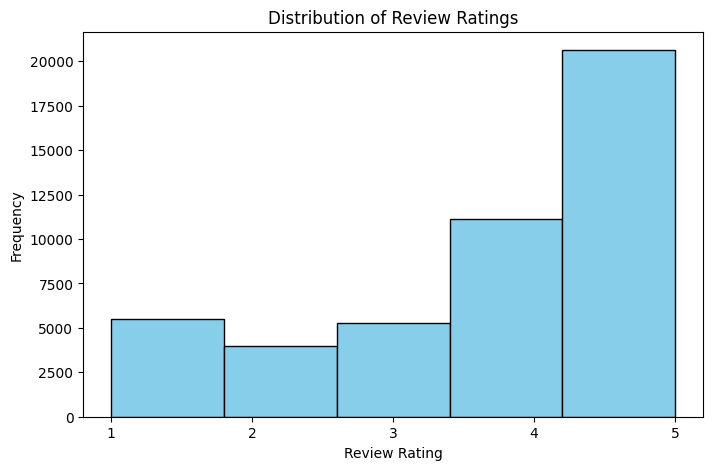

In [ ]:
import matplotlib.pyplot as plt

# Histogram of review ratings
plt.figure(figsize=(8, 5))
plt.hist(merged_df['review_stars'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Display ratings 1-5 on x-axis
plt.show()

**Distribution of Review Ratings**

The histogram of review ratings reveals a strong positive skew, with the majority of ratings concentrated at 4 and 5 stars. This distribution suggests that customers generally have positive dining experiences, as 5-star ratings are the most frequent, indicating high satisfaction. Ratings of 1, 2, and 3 stars are notably less common, which could reflect that fewer customers have neutral to negative experiences or that they are less likely to leave reviews when dissatisfied. The relatively low frequency of 2-star ratings in particular may point to a polarized feedback pattern, where customers are more inclined to either praise or express dissatisfaction without settling in the middle.

Overall, this pattern of mostly high ratings implies that restaurants in this dataset are well-regarded, with limited negative feedback. The absence of any extreme outliers beyond the expected 1 to 5-star range supports the credibility of the data. The prevalence of positive reviews could also be influenced by selection bias, where satisfied customers are more motivated to share their experiences. This trend provides a valuable insight into customer satisfaction, suggesting that the majority of restaurant patrons are pleased with their dining experiences.


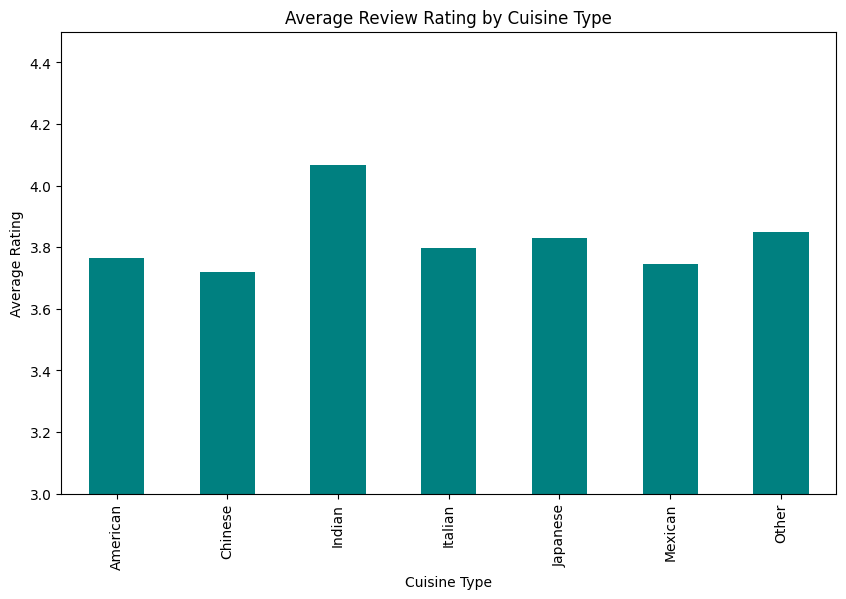

In [25]:
# Calculate average rating by cuisine type
avg_rating_by_cuisine = merged_df.groupby('cuisine_type')['review_stars'].mean()

# Bar chart of average rating by cuisine type
plt.figure(figsize=(10, 6))
avg_rating_by_cuisine.plot(kind='bar', color='teal')
plt.title('Average Review Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.ylim(3, 4.5)
plt.show()


**Average Review Rating by Cuisine Type**

The bar chart shows the average review rating by cuisine type, providing insights into how different types of cuisine are perceived by customers.

1. **Higher Ratings for Indian Cuisine**: Indian cuisine has the highest average rating, slightly above 4.0. This suggests that customers generally have favorable experiences at Indian restaurants in this dataset, possibly due to the popularity or perceived quality of these establishments.

2. **Lower Ratings for Chinese and Mexican Cuisines**: Chinese and Mexican cuisines have the lowest average ratings, both below 3.8. This may indicate that these types of restaurants receive slightly more critical feedback, potentially due to factors like high customer expectations or varying quality across establishments.

Overall, this chart highlights that customer satisfaction, as reflected in average ratings, varies by cuisine type. Indian cuisine appears to be the most highly rated, while Chinese and Mexican cuisines receive relatively lower ratings. This information could be valuable for understanding customer preferences and guiding restaurant improvements based on cuisine type.


<Figure size 1000x600 with 0 Axes>

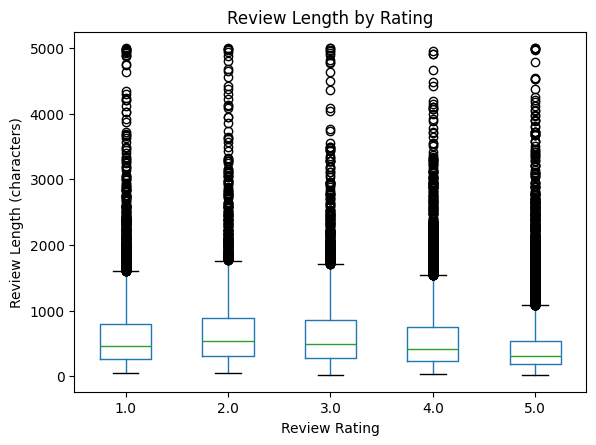

In [21]:
# Box plot of review length by rating
plt.figure(figsize=(10, 6))
merged_df.boxplot(column='review_length', by='review_stars', grid=False)
plt.title('Review Length by Rating')
plt.suptitle('')
plt.xlabel('Review Rating')
plt.ylabel('Review Length (characters)')
plt.show()


**Review Length by Rating**

The box plot displays the distribution of review lengths (in characters) for each review rating from 1 to 5 stars, highlighting any trends in review detail across different ratings.

1. **Consistency in Median Review Length**: The median review length remains relatively stable across ratings, suggesting that typical review lengths do not vary dramatically between positive and negative ratings. This implies that both satisfied and dissatisfied customers tend to leave reviews of similar length on average.

2. **High Variability and Outliers**: Each rating category exhibits a high degree of variability, as indicated by the wide range in review length and the presence of numerous outliers above the whiskers. This variability suggests that while some reviews are brief, others are much more detailed, particularly in the form of long, detailed feedback. Outliers extending beyond 2000 characters are common in all ratings, showing that detailed feedback is not exclusive to any specific rating.

Overall, this plot suggests that review length is not strongly dependent on the rating, as both positive and negative reviews can be equally detailed. However, the presence of outliers indicates that some customers, regardless of their satisfaction level, feel compelled to leave very detailed feedback. This insight could be useful for understanding customer engagement and identifying which reviews might provide in-depth insights into customer experiences.


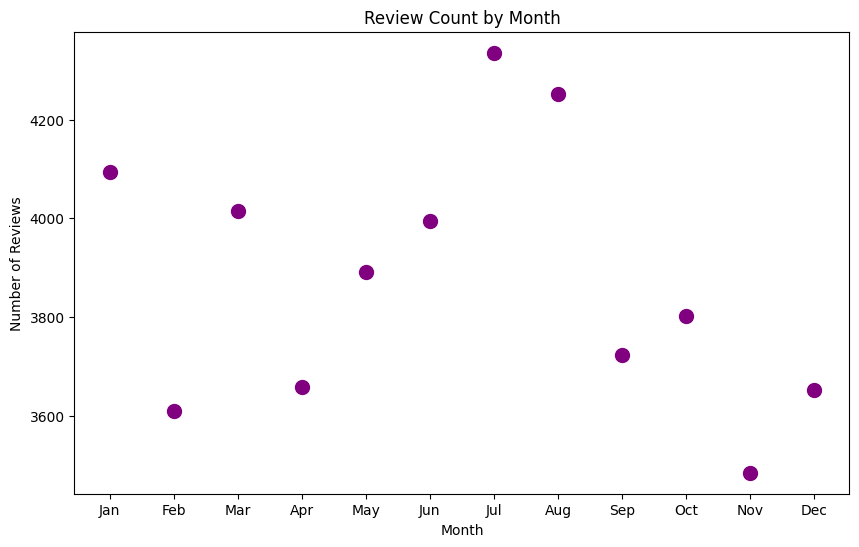

In [22]:
# Count reviews by month
review_count_by_month = merged_df['month'].value_counts().sort_index()

# Scatter plot of review count by month
plt.figure(figsize=(10, 6))
plt.scatter(review_count_by_month.index, review_count_by_month.values, color='purple', s=100)
plt.title('Review Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


**Review Count by Month**

The scatter plot illustrates the number of reviews received by restaurants each month, providing insights into seasonal patterns in customer review activity.

1. **Peak Review Activity in Summer**: The highest number of reviews is observed in July, followed closely by August and January. This indicates that summer months tend to be busier for review activity, possibly due to increased dining out during vacations and holidays. The high review count in January could be influenced by post-holiday dining and events.

2. **Lower Review Activity in Late Fall**: Review counts decrease notably in the months of November and December, which are the lowest in the year. This dip could be due to colder weather, which might reduce dining out frequency, or a shift in focus towards holiday preparations and celebrations at home.

Overall, this plot highlights a seasonal trend where summer months see a peak in review activity, while late fall experiences a decline. These insights can help restaurant businesses anticipate and prepare for fluctuations in customer engagement throughout the year.

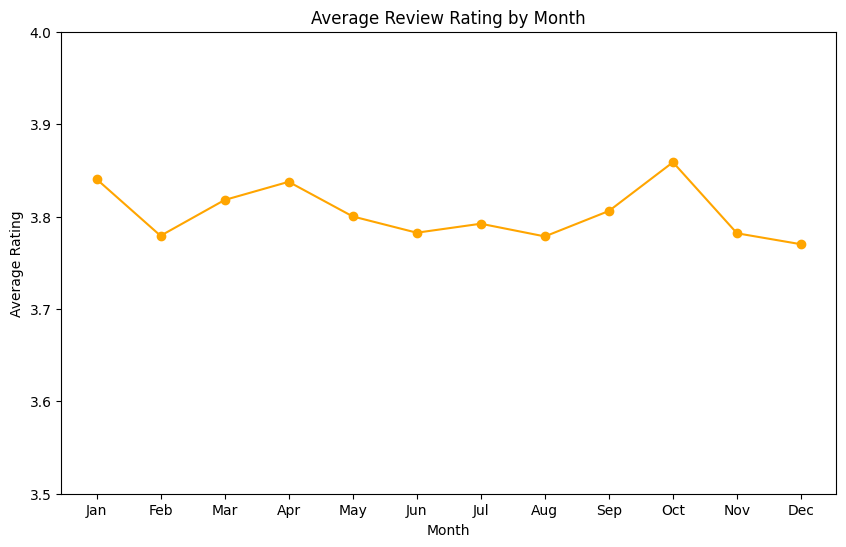

In [26]:
# Calculate average rating by month
avg_rating_by_month = merged_df.groupby('month')['review_stars'].mean()

# Line plot of average rating by month
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_by_month.index, avg_rating_by_month.values, marker='o', color='orange')
plt.title('Average Review Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(3.5, 4.0)
plt.show()


**Average Review Rating by Month**

The line plot shows the average review rating by month, offering insights into seasonal variations in customer sentiment.

1. **Higher Ratings in October**: October has the highest average rating, close to 3.9. This suggests that customers may have more positive dining experiences or perceptions during this month, possibly due to seasonal menus, fall festivities, or favorable customer moods in the lead-up to the holiday season.

2. **Stable but Slightly Lower Ratings in Summer**: Average ratings show a slight decline during the summer months (June, July, and August), hovering around 3.8. This could indicate that while summer sees a high volume of reviews, the ratings may be slightly lower, potentially due to the increased demand on restaurants, which could impact service quality or customer expectations.

Overall, this plot indicates some seasonal fluctuation in customer sentiment, with a peak in October and a slight dip during the summer. These insights can help restaurants understand when customer satisfaction might vary and adjust their strategies accordingly.


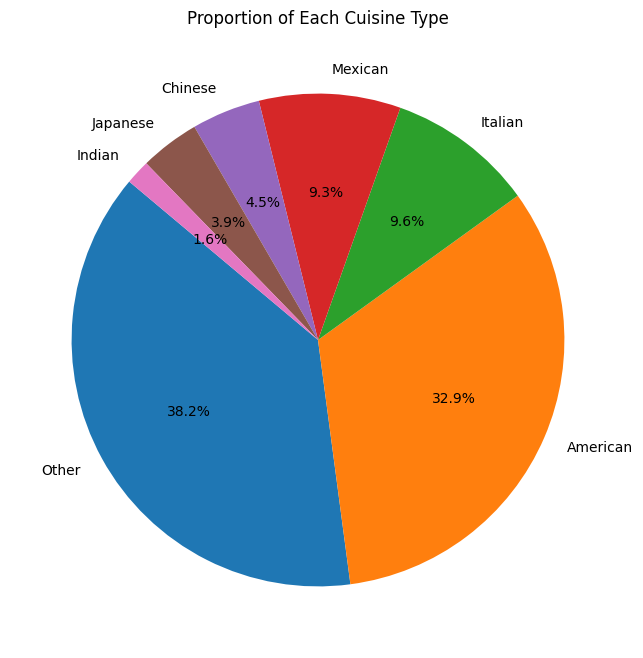

In [24]:
# Calculate the proportion of each cuisine type
cuisine_counts = merged_df['cuisine_type'].value_counts()

# Pie chart of cuisine types
plt.figure(figsize=(8, 8))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Cuisine Type')
plt.show()


**Proportion of Each Cuisine Type**

The pie chart displays the proportion of each cuisine type in the dataset, providing insights into the distribution of restaurant types.

1. **Dominance of 'Other' and American Cuisines**: The largest segments are **"Other"** (38.2%) and **American** (32.9%), indicating that a substantial portion of the restaurants either do not fall into a specific category or are categorized as American. This may reflect the diversity of cuisine types beyond the specified categories or the prominence of American cuisine in the dataset.

2. **Italian and Mexican Cuisines as Notable Categories**: After "Other" and American, **Italian** (9.6%) and **Mexican** (9.3%) cuisines make up the next largest segments, suggesting that these cuisines are relatively popular or well-represented in the dataset. Other cuisine types like **Chinese** (4.5%), **Japanese** (3.9%), and **Indian** (1.6%) have smaller shares.

Overall, this chart highlights the distribution and variety of cuisine types, with American and "Other" cuisines comprising the majority. This information provides context on the dataset's composition and may inform analysis on how cuisine type affects review ratings and other factors.


## Synthesis

#### Research Question 1: <span style="color:orange;">How do review ratings vary by restaurant category in the U.S.?
By analyzing review ratings across different cuisine types, we observed notable differences in customer satisfaction. Indian cuisine received the highest average rating, with a mean rating of approximately **4.04**, suggesting that customers generally have favorable experiences at Indian restaurants. In contrast, Chinese and Mexican cuisines had lower average ratings of around **3.72** and **3.74**, respectively, indicating slightly more critical feedback in these categories.

An ANOVA test confirmed that the differences in average ratings across cuisine types are statistically significant (F-statistic = **12.19**, p-value < **0.001**). This suggests that the variation in ratings is not random but instead reflects differing levels of customer satisfaction across cuisines. The significant results underscore that certain cuisines are perceived more positively by customers, providing valuable insights for restaurant owners. Restaurants in lower-rated categories, such as Chinese and Mexican, may consider focusing on factors that influence customer satisfaction, such as consistency in quality, customer service, or specific menu items that resonate with customers.

#### Research Question 2: <span style="color:orange;">What times of the year do restaurants tend to receive the most reviews, and how does this trend affect review sentiment?
Our analysis of monthly review counts reveals clear seasonal trends in customer engagement. Review activity peaks in **July** with approximately **4,336** reviews, followed closely by **August** with around **4,252** reviews. This increase in reviews during the summer months likely corresponds to higher dining-out frequency during vacation periods, as customers are more likely to visit restaurants and share their experiences. Additionally, **January** also shows a high number of reviews (around **4,095**), potentially due to post-holiday dining and gatherings.

Examining average ratings across months, we found that **October** has the highest average rating, close to **3.86**, indicating that customers are generally more satisfied during this month. In contrast, **December** and **August** have slightly lower average ratings of around **3.77** and **3.78**, respectively. This trend suggests that while review activity is high during summer, customer satisfaction may be slightly lower, possibly due to increased demand and the resulting impact on service quality. The variation in monthly ratings was supported by a one-way ANOVA test, which found a statistically significant difference in ratings across months (F-statistic = **421.88**, p-value < **0.001**).

These findings provide actionable insights for restaurant owners and managers. By understanding peak review times, they can anticipate periods of high demand and adjust staffing and service levels accordingly. The seasonal trend in customer sentiment also suggests an opportunity for restaurants to enhance the dining experience during peak seasons to maintain high customer satisfaction.

#### Research Question 3: <span style="color:orange;">Are restaurants with higher average ratings more likely to have detailed reviews compared to those with lower ratings?
The analysis of review length by rating revealed a pattern where reviews with lower ratings (e.g., 1- and 2-star ratings) tend to be longer and more detailed. Specifically, 1-star reviews had an average length of **627 characters**, while 2-star reviews had an average length of **696 characters**. In contrast, 5-star reviews were the shortest, with an average length of **443 characters**. This pattern suggests that dissatisfied customers are more likely to leave detailed feedback, perhaps to provide specific reasons for their dissatisfaction or to voice complaints.

A one-way ANOVA test confirmed that the differences in review length by rating are statistically significant (F-statistic = **421.88**, p-value < **0.001**), indicating that review length is influenced by the rating given. This insight is important for businesses, as longer reviews from dissatisfied customers may contain detailed feedback that can help identify specific issues that need to be addressed, such as service quality, menu items, or ambiance.

---

### Added Value of Combining Datasets

Combining the review data with restaurant and geographical data provided a more comprehensive perspective that would not have been possible with individual datasets alone. For example:

- **Cuisine Analysis**: The combined data allowed us to assess customer satisfaction by cuisine type, identifying significant differences in average ratings across categories like Indian, Mexican, and Chinese, which would not have been possible with review data alone.
- **Seasonal Trends**: By incorporating date information, we were able to uncover seasonal trends in both review counts and average ratings, showing peak review times and seasonal sentiment variations. These insights are valuable for understanding customer behavior across different times of the year.
- **Detailed Feedback Analysis**: With access to both review ratings and review lengths, we could examine how customers express satisfaction or dissatisfaction, revealing that lower ratings are associated with more detailed reviews.

Overall, the integration of these datasets allowed for a multi-dimensional analysis, uncovering patterns in customer satisfaction, seasonal behaviors, and feedback trends that offer actionable insights for restaurant businesses to improve customer experience and optimize operations throughout the year.
